<a href="https://colab.research.google.com/github/suman-8848/new-repo/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16N9qnkiifze-nNe4vZqmijCZPwldimxa' -O diabetes.csv

--2024-09-12 02:15:13--  https://docs.google.com/uc?export=download&id=16N9qnkiifze-nNe4vZqmijCZPwldimxa
Resolving docs.google.com (docs.google.com)... 172.217.218.139, 172.217.218.102, 172.217.218.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16N9qnkiifze-nNe4vZqmijCZPwldimxa&export=download [following]
--2024-09-12 02:15:13--  https://drive.usercontent.google.com/download?id=16N9qnkiifze-nNe4vZqmijCZPwldimxa&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.79.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875 (23K) [application/octet-stream]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.32K  --.-KB/s    in

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_raw = pd.read_csv('diabetes.csv')

In [ ]:
data_raw.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


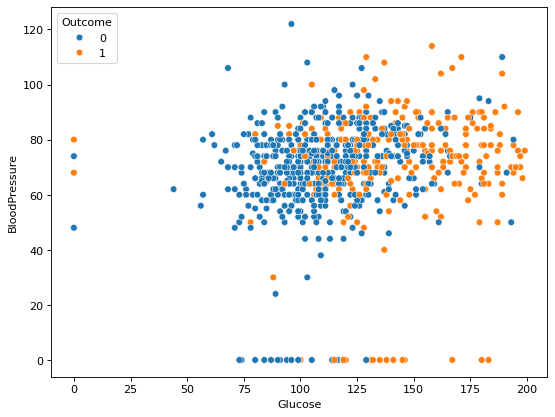

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x = data_raw['Glucose'], y = data_raw['BloodPressure'], hue = data_raw['Outcome'])
plt.show()

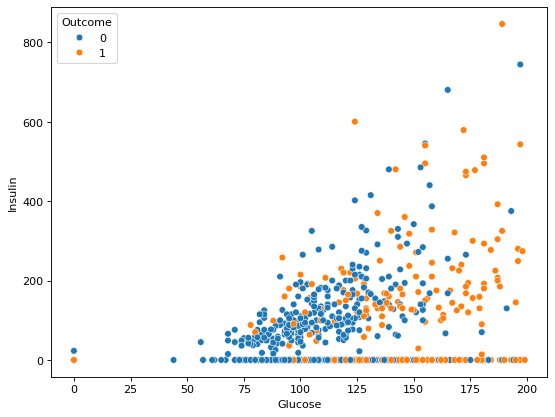

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x = data_raw['Glucose'], y = data_raw['Insulin'], hue = data_raw['Outcome'])
plt.show()

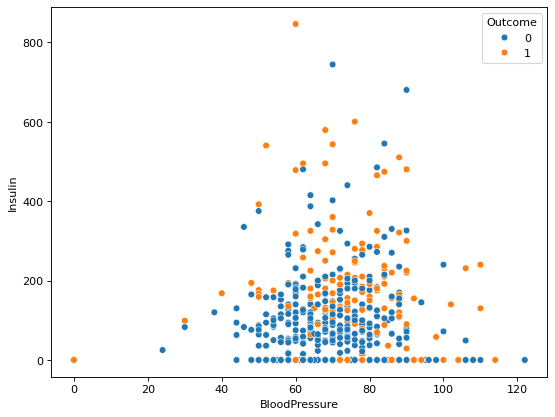

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x = data_raw['BloodPressure'], y = data_raw['Insulin'], hue = data_raw['Outcome'])
plt.show()

<Axes: xlabel='Outcome', ylabel='Count'>

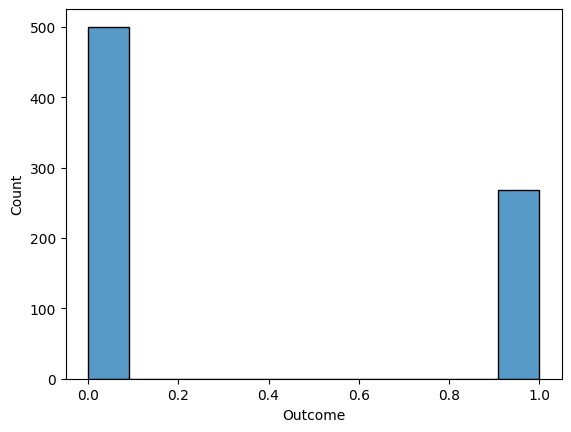

In [ ]:
sns.histplot(data_raw['Outcome'])

In [ ]:
diabetes = data_raw.dropna()
diabetes = diabetes[diabetes["Insulin"]!=0]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler=StandardScaler()
diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=scaler.fit_transform(diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])
diabetes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.713386,-1.062114,-0.373759,-0.582083,-0.518847,-0.678875,-1.025340,-0.963548,0
4,-1.025344,0.468651,-2.461427,0.561761,0.104968,1.404168,5.040165,0.214537,1
6,-0.089470,-1.412915,-1.658478,0.275800,-0.569426,-0.276153,-0.793701,-0.472679,1
8,-0.401428,2.382108,-0.052579,1.514965,3.266189,-0.345588,-1.051077,2.178012,1
13,-0.713386,2.126981,-0.855528,-0.582083,5.820456,-0.401136,-0.364740,2.767055,1
...,...,...,...,...,...,...,...,...,...
753,-1.025344,1.871853,1.392730,1.419645,2.988002,1.431942,-0.868054,-0.472679,1
755,-0.713386,0.181633,1.392730,0.943043,-0.383968,0.487629,1.519828,0.607232,1
760,-0.401428,-1.094005,-1.016118,-0.296122,-1.176381,-0.637214,0.687644,-0.865374,0
763,2.094236,-0.679423,0.429191,1.800926,0.206127,-0.012301,-1.013901,3.159750,0


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(diabetes,test_size=0.2,random_state=56)

In [ ]:
import numpy as np
class LogisticRegression():
    def __init__(self, lr = 0.1, epochs = 100, regularize = True, lmbda = 0.4):
        self.lr = lr
        self.lmbda = lmbda
        self.regularize = regularize
        self.epochs = epochs
        self.cost = []
        self.accuracy = []

    def fit(self, X_train, Y_train):
      self.w = np.random.normal(size = X_train.shape[1])
      self.b = np.random.normal()

      for i in range(self.epochs):
        self.__propagate(X_train, Y_train)
        self.__optimize()
        print("Epoch: {}, Cost: {}, Accuracy: {}".format(i, self.cost[i], self.accuracy[i]))


    def __propagate(self, X, Y):
      m = X.shape[0]

      #Forward propagation
      z = np.dot(X, self.w) + self.b
      A = self.__sigmoid(z)
      loss = (- 1 / m) * np.sum(Y * np.log(A + 1e-16) + (1 - Y) * (np.log(1 - A + 1e-16)))

      # Backward propagation
      diff = np.array(A-Y).reshape(m,1)
      self.__dw = ((1 / m) * np.dot(X.T, diff)).reshape(-1)
      self.__db = ((1 / m) * np.sum(diff)).reshape(-1)

      if self.regularize:
        self.__dw += (self.lmbda * self.w / m)

      self.cost.append(loss)
      self.accuracy.append(accuracy_score(Y,np.array([1 if i>0.5 else 0 for i in A])))

    def __optimize(self):
      self.w -= self.lr * self.__dw
      self.b -= self.lr * self.__db

    def predict(self, X):
      m = X.shape[0]
      Y_hat = np.zeros(m)
      A = self.__sigmoid(np.dot(X, self.w) + self.b).reshape((m,1))
      A = np.array(A).reshape(-1)
      for i in range(A.shape[0]):
        Y_hat[i] = 1 if A[i] > 0.5 else 0
      return Y_hat


    def __sigmoid(self, z):
      return 1.0/(1 + np.exp(-z))

In [ ]:
train_data.shape

(315, 9)

In [ ]:
test_data.shape


(79, 9)

In [ ]:
train_data_x = train_data[list(diabetes.columns)[:-1]]
train_data_y = train_data['Outcome']

test_data_x = test_data[list(diabetes.columns)[:-1]]
test_data_y = test_data['Outcome']

In [ ]:
learning_rate = 0.1
epochs = 200
model = LogisticRegression(learning_rate ,epochs )
model.fit(train_data_x, train_data_y)

Epoch: 0, Cost: 1.2211725996264664, Accuracy: 0.6253968253968254
Epoch: 1, Cost: 1.2069545974403588, Accuracy: 0.6253968253968254
Epoch: 2, Cost: 1.193056353127617, Accuracy: 0.6285714285714286
Epoch: 3, Cost: 1.179467003660889, Accuracy: 0.6349206349206349
Epoch: 4, Cost: 1.16617618001322, Accuracy: 0.6349206349206349
Epoch: 5, Cost: 1.1531739842746171, Accuracy: 0.638095238095238
Epoch: 6, Cost: 1.140450967217657, Accuracy: 0.6412698412698413
Epoch: 7, Cost: 1.1279981065336113, Accuracy: 0.6507936507936508
Epoch: 8, Cost: 1.1158067858959129, Accuracy: 0.6507936507936508
Epoch: 9, Cost: 1.1038687749515024, Accuracy: 0.6507936507936508
Epoch: 10, Cost: 1.092176210293704, Accuracy: 0.6507936507936508
Epoch: 11, Cost: 1.0807215774325487, Accuracy: 0.6507936507936508
Epoch: 12, Cost: 1.0694976937492149, Accuracy: 0.6476190476190476
Epoch: 13, Cost: 1.0584976923998752, Accuracy: 0.6476190476190476
Epoch: 14, Cost: 1.0477150071195596, Accuracy: 0.6476190476190476
Epoch: 15, Cost: 1.03714335

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(model.accuracy, label="Accuracy")
plt.plot(model.cost, label = "Cost")
plt.grid('on')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Cost")
plt.title("lerning rate = {}".format(learning_rate))
plt.show()

In [ ]:
train_predict = model.predict(train_data_x)

In [ ]:
accuracy_score(train_data_y,train_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_data_y,train_predict)
figure(dpi=90)
sns.heatmap(cm_train, annot=True, fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion matrix (train data)")
plt.show()


In [ ]:
test_predict = model.predict(test_data_x)

print(accuracy_score(test_data_y,test_predict))

cm_test = confusion_matrix(test_data_y,test_predict)
figure(dpi=90)
sns.heatmap(cm_test, annot=True, fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion matrix (test data)")
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)
sns.barplot(x = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age'], y = model.w)
plt.title("Weights of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Weights")
plt.show()

In [ ]:
data = pd.DataFrame((['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], model.w))

In [ ]:
data